In [1]:
import os
from skimage import io
from skimage.feature import blob_doh
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

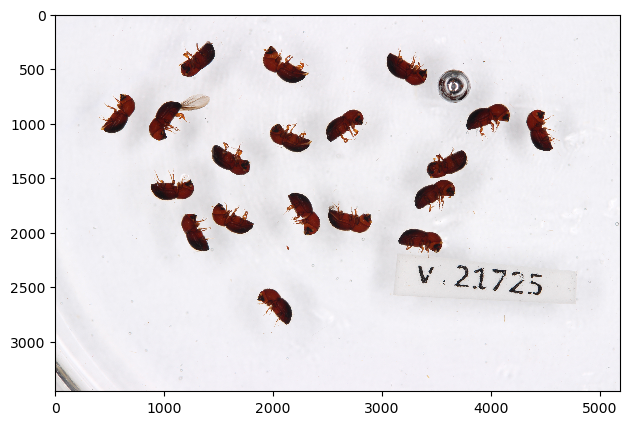

In [2]:
# read image
wd = os.getcwd()
image = io.imread(wd+"/IMG_0269.JPG")
io.imshow(image)

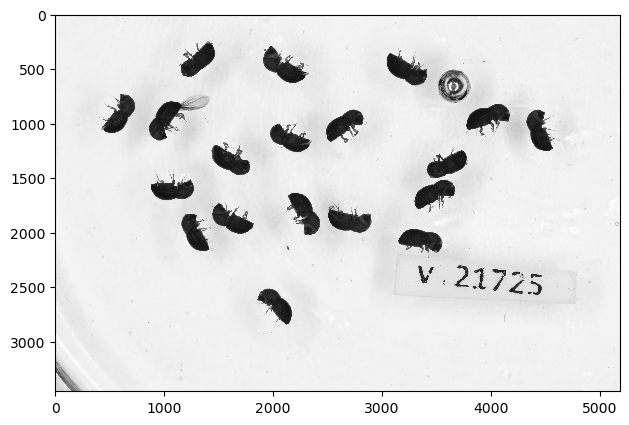

In [3]:
# grey image
image_gray = rgb2gray(image)
io.imshow(image_gray)

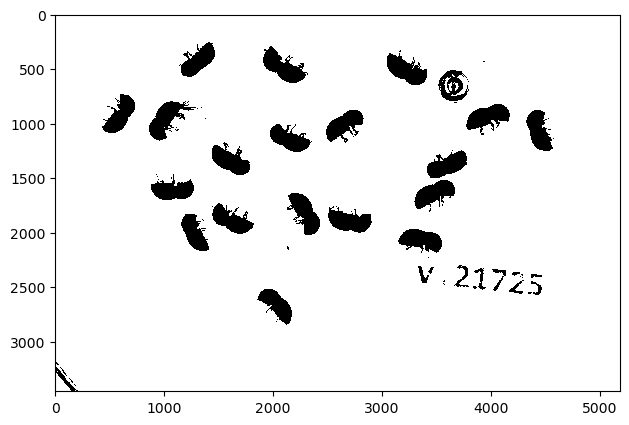

In [4]:
# binarise data
global_thresh = threshold_otsu(image_gray)
binary_global = image_gray > global_thresh
io.imshow(binary_global)

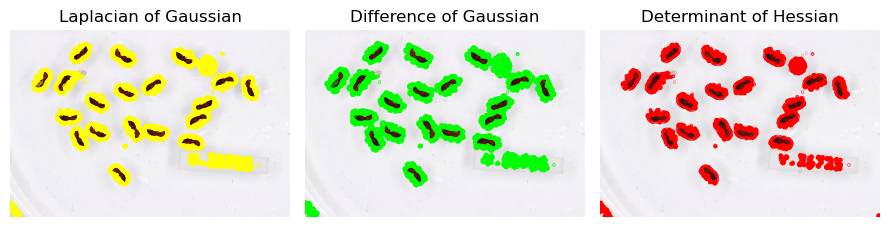

In [5]:
from skimage.feature import blob_dog, blob_log, blob_doh
import matplotlib.pyplot as plt
from math import sqrt

image_gray = binary_global

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

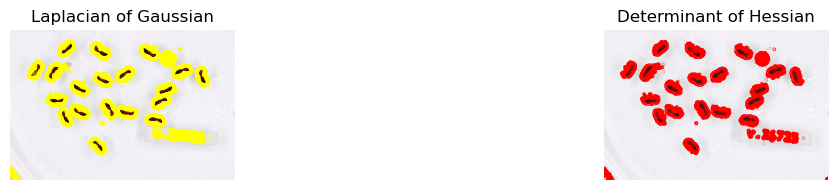

In [9]:
image_gray = binary_global
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_doh]
colors = ['yellow', 'red']
titles = ['Laplacian of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(15, 2), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()